# File and libraries

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


filepath=r'dataset/df_ecom_2_3_outliers_input_v2.csv'


file_tag = "df_ecom_scaling_input"

# DSLabs functions

In [2]:
%run "dslabs_functions.py"


dslabs_functions lodaded


# Data functions

In [3]:
%run "data_functions.py"


dslabs_functions lodaded
data_functions loaded


# Load

In [9]:
# test_data=True
test_data=False

# use to evaluate strategies. otherwise False to just transform data 
evaluate=True
# evaluate=False


if test_data==True:

    df=pd.read_csv(filepath)

    # 1% sample
    df=df.sample(frac=0.01, replace=False)
    

else:
    df=pd.read_csv(filepath)
    # 50% sample
    # data=data.sample(frac=0.5, replace=False)

 
target='conversion'
vars: list[str] = df.columns.to_list()


# ensure sorting by day_of_year for correct splitting 
# "When in the presence of temporal data, data partition shall use older data to train and newer to test, in order to not use future data to classify past data. In any other case, partition shall be random."
df.sort_values(by='day', inplace=True)


df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177828 entries, 0 to 177827
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   event_type           177828 non-null  float64
 1   category_code_lvl_1  177828 non-null  float64
 2   category_code_lvl_2  177828 non-null  float64
 3   category_code_lvl_3  177828 non-null  float64
 4   price                177828 non-null  float64
 5   conversion           177828 non-null  int64  
 6   week_of_month        177828 non-null  int64  
 7   is_weekend           177828 non-null  int64  
 8   day                  177828 non-null  int64  
 9   time_of_day_sin      177828 non-null  float64
 10  time_of_day_cos      177828 non-null  float64
 11  day_of_week_sin      177828 non-null  float64
 12  day_of_week_cos      177828 non-null  float64
 13  hour_sin             177828 non-null  float64
 14  hour_cos             177828 non-null  float64
 15  min_sin              1

In [7]:
df.head()

,event_type,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,price,conversion,week_of_month,is_weekend,day,time_of_day_sin,time_of_day_cos,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos,min_sin,min_cos
0,0.0,7.0,45.0,105.0,128.450000,0,0,0,0,0.0,1.0,1.0,0.0,0.817,-0.577,-0.000,1.000
2836,0.0,12.0,60.0,128.0,993.422936,0,0,0,0,-0.0,1.0,1.0,0.0,-0.888,0.460,-1.000,-0.027
2837,0.0,3.0,20.0,62.0,0.790000,0,0,0,0,-0.0,1.0,1.0,0.0,0.979,0.203,-0.921,0.389
2838,0.0,5.0,27.0,76.0,7.390000,0,0,0,0,0.0,1.0,1.0,0.0,0.998,-0.068,0.848,-0.530
2839,0.0,0.0,0.0,2.0,427.040000,0,0,0,0,0.0,1.0,1.0,0.0,0.942,-0.335,0.848,-0.530


# Scale 1 - Standard Scaler

## Scale 1 strategy Application

In [10]:
from pandas import DataFrame, Series
from sklearn.preprocessing import StandardScaler



def apply_strategy_1(df: DataFrame) -> DataFrame:

    df_copy=df.copy()
    
    # this script is available in data_functions originally from DSLabs site in Outlier chapter
    
    # Separate the target column from the features
    target_data: Series = df_copy.pop(target)  # Remove the target from the dataframe for scaling
    
    # Apply scaling to only the feature columns
    transf: StandardScaler = StandardScaler(with_mean=True, with_std=True, copy=True).fit(df_copy)
    df_zscore = DataFrame(transf.transform(df_copy), index=df_copy.index, columns=df_copy.columns)
    
    # Add the target column back to the scaled dataframe
    df_zscore[target] = target_data

    return df_zscore

df_1=apply_strategy_1(df)



df_1.columns


Index(['event_type', 'category_code_lvl_1', 'category_code_lvl_2',
       'category_code_lvl_3', 'price', 'week_of_month', 'is_weekend', 'day',
       'time_of_day_sin', 'time_of_day_cos', 'day_of_week_sin',
       'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos',
       'conversion'],
      dtype='object')

In [43]:
df_1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 177828 entries, 0 to 177827
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   category_code_lvl_1  177828 non-null  float64
 1   category_code_lvl_2  177828 non-null  float64
 2   category_code_lvl_3  177828 non-null  float64
 3   price                177828 non-null  float64
 4   week_of_month        177828 non-null  float64
 5   is_weekend           177828 non-null  float64
 6   day                  177828 non-null  float64
 7   is_view              177828 non-null  float64
 8   is_cart              177828 non-null  float64
 9   time_of_day_sin      177828 non-null  float64
 10  time_of_day_cos      177828 non-null  float64
 11  day_of_week_sin      177828 non-null  float64
 12  day_of_week_cos      177828 non-null  float64
 13  hour_sin             177828 non-null  float64
 14  hour_cos             177828 non-null  float64
 15  min_sin              1

## Scale 1 Target Prep

In [11]:
df_1.columns

Index(['event_type', 'category_code_lvl_1', 'category_code_lvl_2',
       'category_code_lvl_3', 'price', 'week_of_month', 'is_weekend', 'day',
       'time_of_day_sin', 'time_of_day_cos', 'day_of_week_sin',
       'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos',
       'conversion'],
      dtype='object')

## Scale 1 train/test split 

Labels=[0, 1]


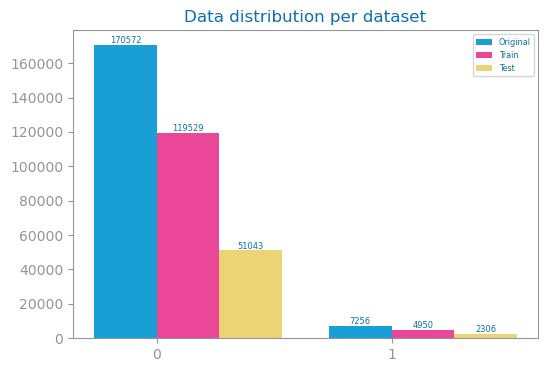

In [12]:
if evaluate ==True:
    
    from pandas import concat
    from matplotlib.pyplot import figure, show
    from sklearn.model_selection import train_test_split
    from dslabs_functions import plot_multibar_chart


    # Call the function to split the data
    y_1, X_1, labels, values = define_target_and_prepare_data(df_1, target)

    train_1, test_1 = split_data_save_csv(pd.DataFrame(X_1, columns=df_1.columns), y_1, data_columns=df_1.columns, target_column=target)


    # Distribution check
    values["Train"] = [
        len(train_1[train_1[target] == 0]),
        len(train_1[train_1[target] == 1]),
    ]
    values["Test"] = [
        len(test_1[test_1[target] == 0]),
        len(test_1[test_1[target] == 1]),
    ]

    # Visualize the distribution
    figure(figsize=(6, 4))
    plot_multibar_chart(labels, values, title="Data distribution per dataset")
    show()

In [13]:
# Verificar o intervalo de dias no conjunto de treino
min_day_train = train_1['day'].min()
max_day_train = train_1['day'].max()

# Verificar o intervalo de dias no conjunto de teste
min_day_test = test_1['day'].min()
max_day_test = test_1['day'].max()

# Exibir os resultados
print(f"Train set - Min day: {min_day_train}, Max day: {max_day_train}")
print(f"Test set - Min day: {min_day_test}, Max day: {max_day_test}")

Train set - Min day: -1.917359674970286, Max day: 0.7117451258167682
Test set - Min day: 0.7117451258167682, Max day: 1.54827847152174


## Scale 1 evaluate

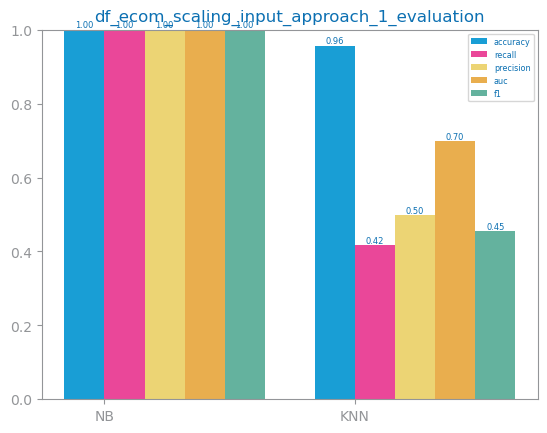

In [15]:
# evaluate_approach is in data_functions originally from DSLABS/ Data Prep / Methodology
# removed Multinomial from run_NB function because dataset has negative values
if evaluate == True:
    
    figure()
    eval_1: dict[str, list] = evaluate_approach(train_1, test_1, target='conversion', metric="recall")
    plot_multibar_chart(
        ["NB", "KNN"], eval_1, title=f"{file_tag}_approach_1_evaluation", percentage=True
    )
    savefig(f"images/{file_tag}_approach_1_evaluation.png")
    show()

# Scale 2 - MinMax Scaler


## Scale 2 strategy aplication

In [16]:
from pandas import DataFrame, Series
from sklearn.preprocessing import MinMaxScaler



def apply_strategy_2(df):

    df_copy=df.copy()
    
    # this script is available in data_functions originally from DSLabs site in Outlier chapter
    
    # Separate the target column from the features
    target_data: Series = df_copy.pop(target)  # Remove the target from the dataframe for scaling
    
    # Apply MinMax scaling to the feature columns only
    transf: MinMaxScaler = MinMaxScaler(feature_range=(0, 1), copy=True).fit(df_copy)
    df_minmax = DataFrame(transf.transform(df_copy), index=df_copy.index, columns=df_copy.columns)
    
    # Add the target column back to the scaled dataframe
    df_minmax[target] = target_data  # Add the unscaled target column back

    return df_minmax

df_2=apply_strategy_2(df)
df_2.columns

Index(['event_type', 'category_code_lvl_1', 'category_code_lvl_2',
       'category_code_lvl_3', 'price', 'week_of_month', 'is_weekend', 'day',
       'time_of_day_sin', 'time_of_day_cos', 'day_of_week_sin',
       'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos',
       'conversion'],
      dtype='object')

## Scale 2 train/test split 

Labels=[0, 1]


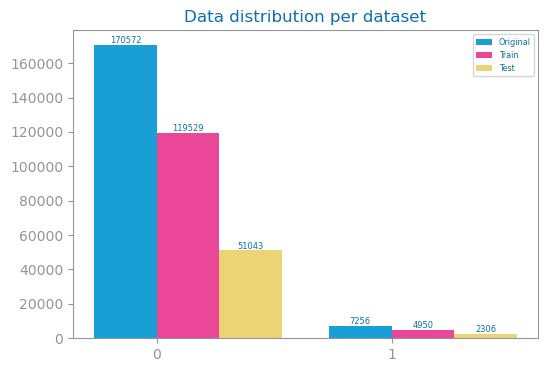

In [17]:
if evaluate==True:

    from pandas import concat
    from matplotlib.pyplot import figure, show
    from sklearn.model_selection import train_test_split
    from dslabs_functions import plot_multibar_chart

    # train/test split from DSLABS Classification/Evaluation Chapter
    # created split_data_save_csv on data_functions

    # Call the functions to split the data

    y_2, X_2, labels, class_counts = define_target_and_prepare_data(df_2, target=target)

    train_2, test_2 = split_data_save_csv(pd.DataFrame(X_2, columns=df_2.columns), y_2, data_columns=df_2.columns, target_column=target)


    values["Train"] = [
        len(train_2[train_2[target] == 0]),
        len(train_2[train_2[target] == 1]),
    ]
    values["Test"] = [
        len(test_2[test_2[target] == 0]),
        len(test_2[test_2[target] == 1]),
    ]

    figure(figsize=(6, 4))
    plot_multibar_chart(labels, values, title="Data distribution per dataset")

## Scale 2 evaluate

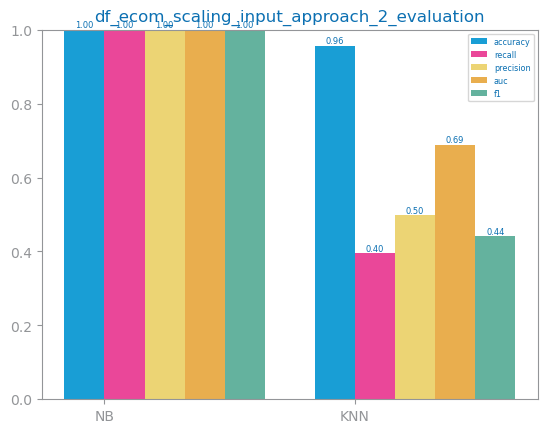

In [19]:
if evaluate == True:
    figure()
    eval_2: dict[str, list] = evaluate_approach(train_2, test_2, target='conversion', metric="recall")
    plot_multibar_chart(
        ["NB", "KNN"], eval_2, title=f"{file_tag}_approach_2_evaluation", percentage=True
    )
    savefig(f"images/{file_tag}_approach_2_evaluation.png")
    show()

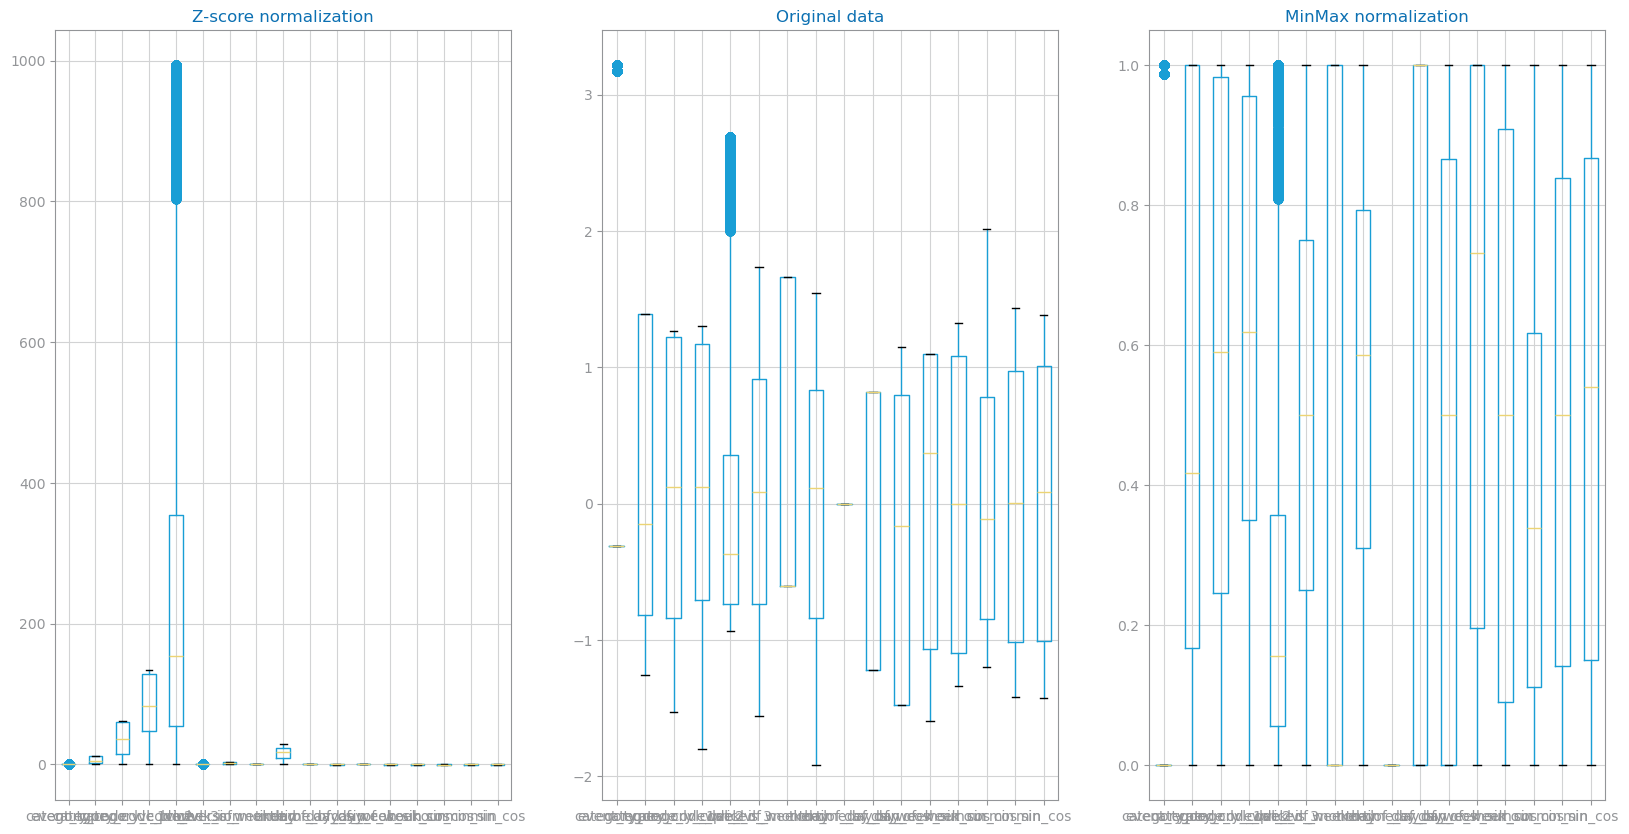

In [21]:
if evaluate == True:

    from matplotlib.pyplot import subplots, show

    fig, axs = subplots(1, 3, figsize=(20, 10), squeeze=False)
    axs[0, 1].set_title("Original data")
    df.boxplot(ax=axs[0, 0])

    axs[0, 0].set_title("Z-score normalization")
    df_1.boxplot(ax=axs[0, 1])

    axs[0, 2].set_title("MinMax normalization")
    df_2.boxplot(ax=axs[0, 2])
    show()

# Approach uplift comparison

## uplift df

In [22]:
if evaluate ==True:

    algorithms = ['Naive Bayes', 'KNN']

    # Create DataFrames for eval_1 and eval_2
    df_eval_1 = pd.DataFrame(eval_1, index=algorithms)
    df_eval_2 = pd.DataFrame(eval_2, index=algorithms)

    # Calculate uplift
    df_uplift = df_eval_2 - df_eval_1



    # Combine everything into one DataFrame (without misalignment issues)
    comparison_df = pd.concat([df_eval_1, df_eval_2, df_uplift], axis=1)
    comparison_df.columns = pd.MultiIndex.from_product([['Approach 1', 'Approach 2', 'Uplift'], eval_1.keys()])



    # Display the DataFrame
    display(comparison_df)

Approach 1                                         Approach 2  \
              accuracy    recall precision       auc        f1   accuracy   
Naive Bayes   1.000000  1.000000  1.000000  1.000000  1.000000   1.000000   
KNN           0.956644  0.417173  0.498187  0.699094  0.454095   0.956625   

                                                      Uplift            \
              recall precision       auc        f1  accuracy    recall   
Naive Bayes  1.00000  1.000000  1.000000  1.000000  0.000000  0.000000   
KNN          0.39549  0.497817  0.688733  0.440793 -0.000019 -0.021683   

                                           
            precision       auc        f1  
Naive Bayes  0.000000  0.000000  0.000000  
KNN         -0.000371 -0.010361 -0.013302

# Analysis

Scalling treatment:
- In Scalling treatment, we got the t2o approaches getting 100% in all evaluation metrics
     - Something is wrong with the datset or with our procedure steps

Comparing with previous dataset:
- For now lets save the approach 2 has the best. In balancing lets use the method for the outliers dataset


Decision:
- In balancing, use outliers dataset


# save to csv

In [24]:
if test_data==False:
    

    data_save=df.copy()

    # apply winning strategy
    data_save=apply_strategy_1(data_save)
        
    data_save.to_csv(f"dataset/df_ecom_2_4_scaler_input_v2.csv", index=False)
    

    print(data_save.columns)

Index(['event_type', 'category_code_lvl_1', 'category_code_lvl_2',
       'category_code_lvl_3', 'price', 'week_of_month', 'is_weekend', 'day',
       'time_of_day_sin', 'time_of_day_cos', 'day_of_week_sin',
       'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos',
       'conversion'],
      dtype='object')


## train test csv

In [25]:
if test_data==False:
    

    data_save_copy=data_save.copy()

    
    y, X, labels, class_counts = define_target_and_prepare_data(data_save_copy, target=target)

    train, test = split_data_save_csv(pd.DataFrame(X, columns=data_save_copy.columns), y, data_columns=data_save_copy.columns, target_column=target)  
    
    train.to_csv(f"dataset/df_ecom_2_4_scaler_input_v2_train.csv", index=False)
    print(train.columns)
    
    test.to_csv(f"dataset/df_ecom_2_4_scaler_input_v2_test.csv", index=False)
    print(test.columns)

Labels=[0, 1]
Index(['event_type', 'category_code_lvl_1', 'category_code_lvl_2',
       'category_code_lvl_3', 'price', 'week_of_month', 'is_weekend', 'day',
       'time_of_day_sin', 'time_of_day_cos', 'day_of_week_sin',
       'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos',
       'conversion'],
      dtype='object')
Index(['event_type', 'category_code_lvl_1', 'category_code_lvl_2',
       'category_code_lvl_3', 'price', 'week_of_month', 'is_weekend', 'day',
       'time_of_day_sin', 'time_of_day_cos', 'day_of_week_sin',
       'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos',
       'conversion'],
      dtype='object')
